In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [60]:
%matplotlib notebook

In [61]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [62]:
# Loading in the compressed data
Flattenedfilename = 'Segments2_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments2_compr_flat_filt.npz
Segments2_compr_flat_filt_roughness.jpg
12
2019-08-02/case1.1


In [63]:
# Histogram accumulation
countslist = []
accumlist = [] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .25
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 10
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Z2 ranging from 0 to 0.25
Max number of bins specified is 10
Sturges rule says maxbins = 10
Using nbins =  10
Using levels = 3 for uncertainty analysis


Original =  756
4 0 189 [48 45 26 22 12  8  9  5  8]
4 1 189 [52 34 36 15 16 14  8  5  3]
4 2 189 [57 40 26 16 12 12  9  8  5]
4 3 189 [59 38 21 17 15 14  6  6  8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.07969564967377674
statsigma =  0.28230417934167523


<IPython.core.display.Javascript object>


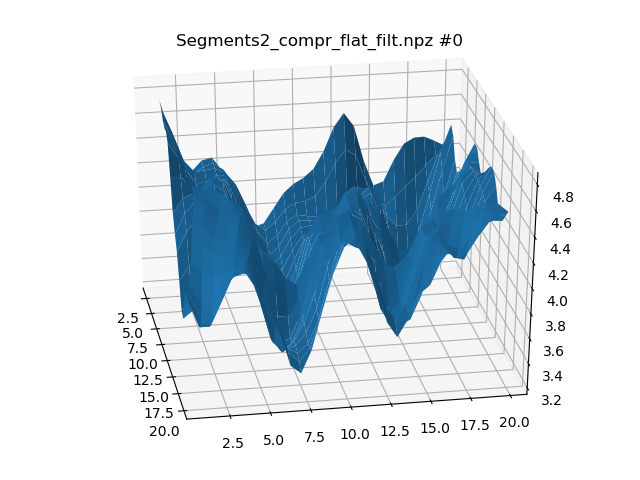

std dev of height =  0.33942723902861566
integral =  0.023242630385487528


<IPython.core.display.Javascript object>


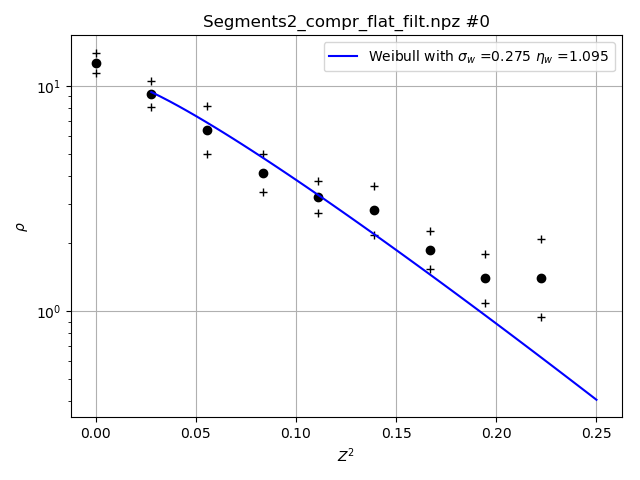

[11.38502046  8.06100577  4.99422016  3.37638396  2.72781627  2.18935822
  1.54484829  1.09467911  0.94235839]
Original =  756
4 0 189 [34 29 23 16 17  8 14  4 13]
4 1 189 [37 21 30  9 16  8 16 10  7]
4 2 189 [36 22 22 22 14 11 12 10  2]
4 3 189 [34 28 20 17 17 16  8 12  8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.1465410297550556
statsigma =  0.38280677861690954


<IPython.core.display.Javascript object>


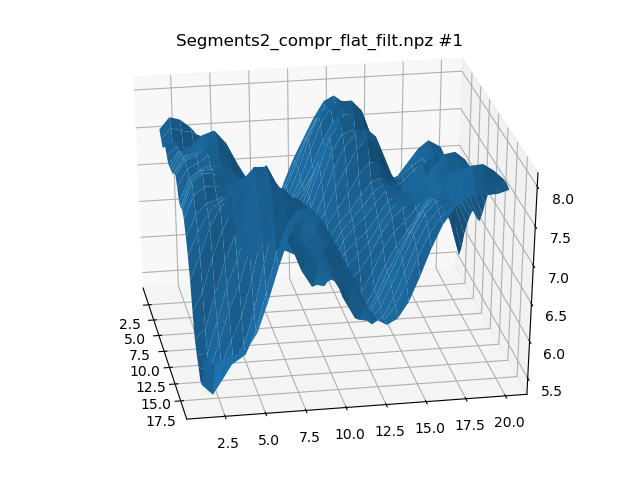

std dev of height =  0.5682733773539044
integral =  0.02396557874085964


<IPython.core.display.Javascript object>


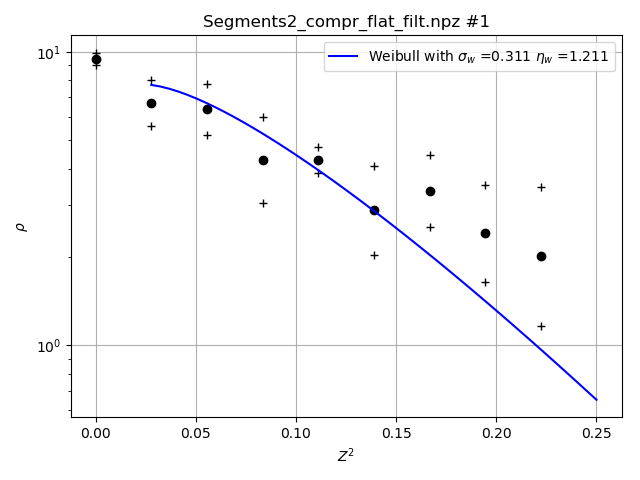

[8.98410338 5.59854408 5.21469664 3.0567554  3.87476495 2.02507252
 2.52074023 1.64838685 1.16628394]
Original =  756
4 0 189 [44 38 25 15 20  8  6  5  4]
4 1 189 [48 34 24 22 12 10  5 10  4]
4 2 189 [52 30 22 21 15 13  8  7  3]
4 3 189 [51 31 23 15 16  8  8  8  8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.11072273142669796
statsigma =  0.33275025383416007


<IPython.core.display.Javascript object>


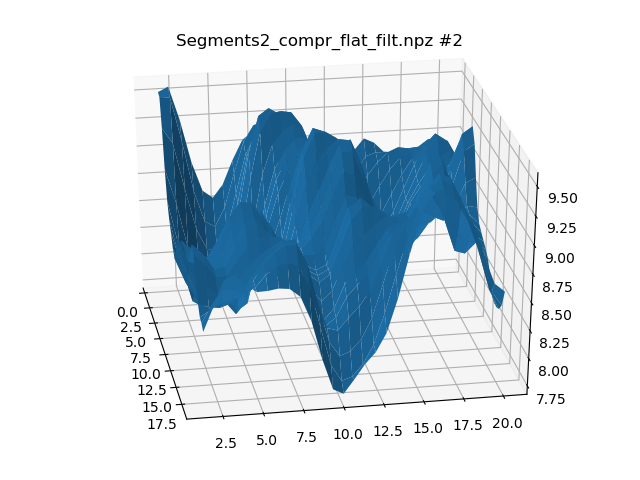

std dev of height =  0.41198664085126807
integral =  0.023361400033019647


<IPython.core.display.Javascript object>


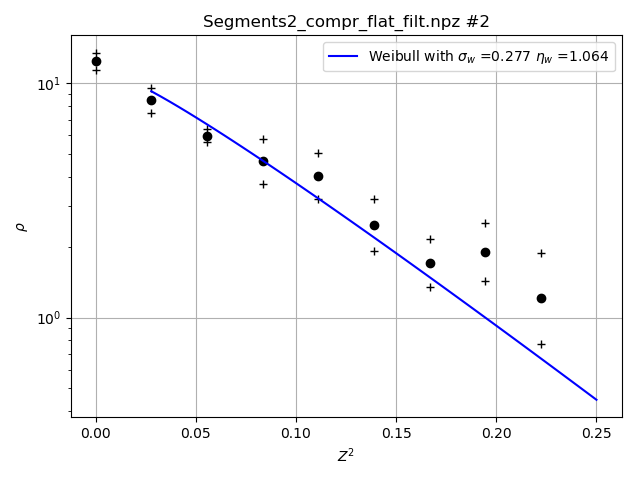

[11.39303948  7.48649996  5.60838728  3.71842548  3.20000815  1.92089181
  1.35524296  1.43071572  0.77406272]
Original =  756
4 0 189 [46 26 23 20 14 11 10  6  6]
4 1 189 [36 34 25 20 14 10  8 11  7]
4 2 189 [39 34 21 20 13 18  5  6  6]
4 3 189 [47 25 26 17 16 19  7  4  3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.12505335474525373
statsigma =  0.3536288375475814


<IPython.core.display.Javascript object>


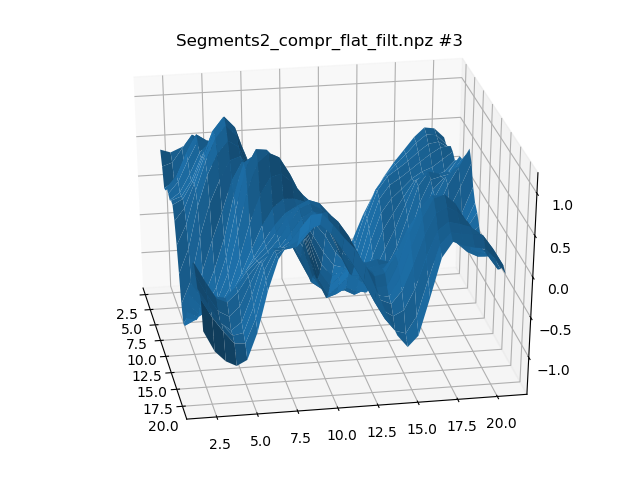

std dev of height =  0.5675039253310853
integral =  0.023736600306278714


<IPython.core.display.Javascript object>


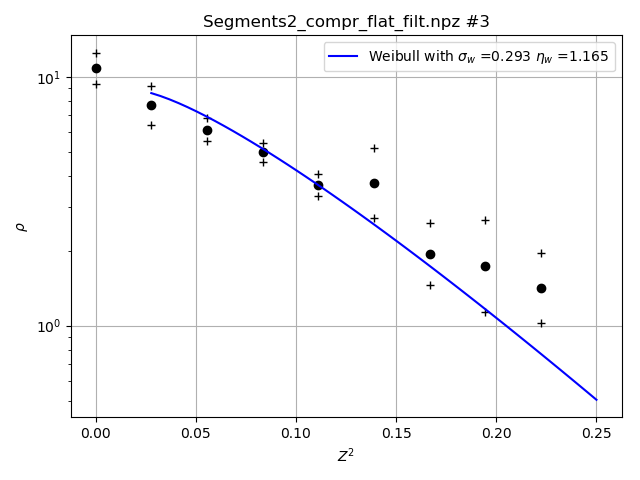

[9.39832212 6.40317186 5.51051261 4.54222317 3.32449126 2.69992952
 1.45122778 1.13714671 1.02955789]
Original =  756
4 0 189 [44 32 33 19 11 13  6 10  6]
4 1 189 [38 36 18 34 17 12 11  8  4]
4 2 189 [47 23 35 15 17 16  6 10  5]
4 3 189 [42 36 29 24 10  5  7  9  6]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.10112471879039973
statsigma =  0.31800113017157616


<IPython.core.display.Javascript object>


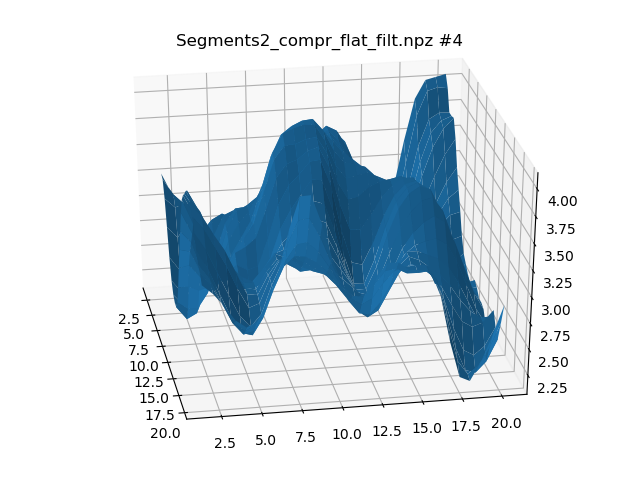

std dev of height =  0.4376120296096829
integral =  0.0239353186039065


<IPython.core.display.Javascript object>


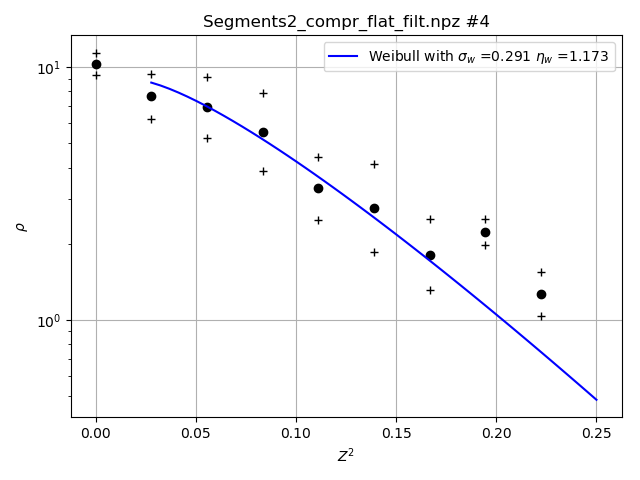

[9.30635178 6.2050627  5.25541709 3.87597559 2.48938681 1.86277258
 1.30720796 1.98092234 1.03687993]
Original =  756
4 0 189 [54 37 22 18 13 12  3  2  5]
4 1 189 [39 40 31 20 12  4 12  6  3]
4 2 189 [38 48 25 20  8 11  7  9  4]
4 3 189 [52 39 27 13 12  9  7  7  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.11099158313459757
statsigma =  0.33315399312419713


<IPython.core.display.Javascript object>


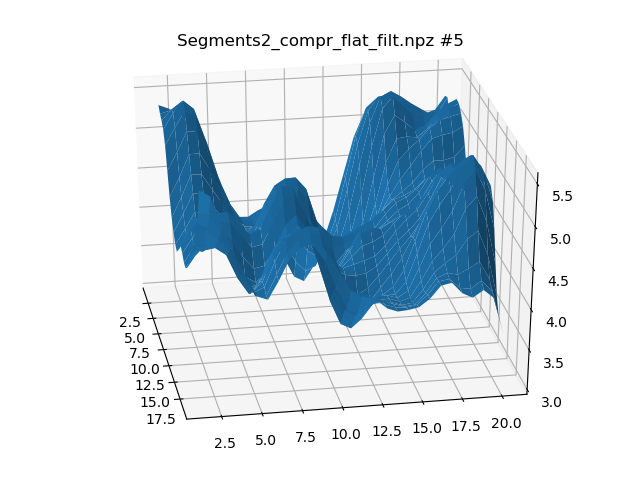

std dev of height =  0.4902514097955113
integral =  0.023670959220736337


<IPython.core.display.Javascript object>


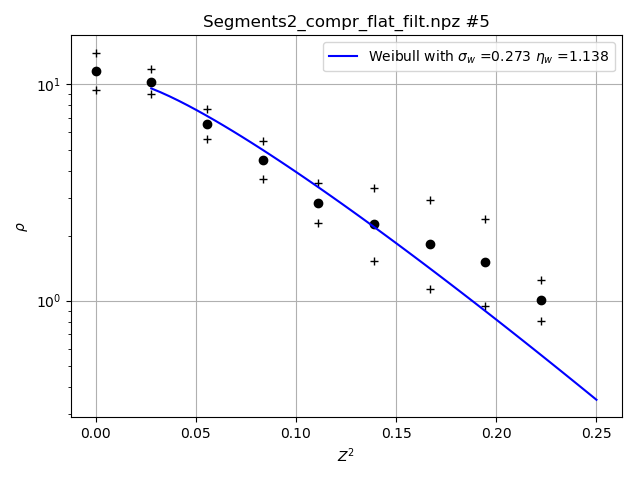

[9.40587872 9.01742864 5.61954809 3.64184376 2.28363351 1.53163616
 1.12986983 0.9475795  0.80645162]
Original =  756
4 0 189 [42 38 22 18 19  9  8 14  5]
4 1 189 [41 36 25 13 23 10  8  7  8]
4 2 189 [44 26 38 14 11 15 10  6  5]
4 3 189 [38 32 40 25  9  6  7  9  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.1065722944659276
statsigma =  0.32645412306467747


<IPython.core.display.Javascript object>


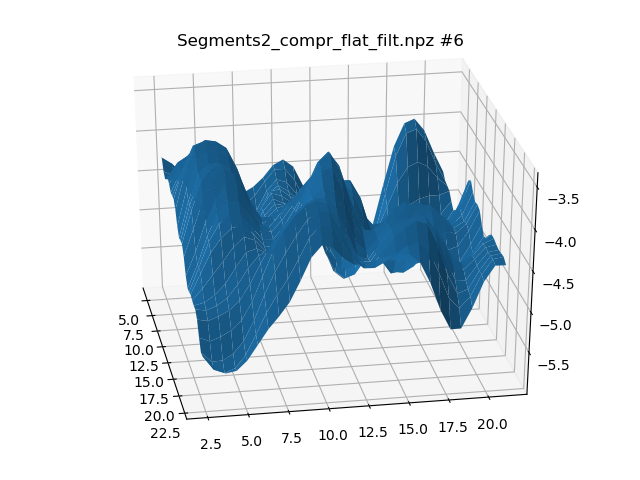

std dev of height =  0.4659534355204852
integral =  0.023986212489862123


<IPython.core.display.Javascript object>


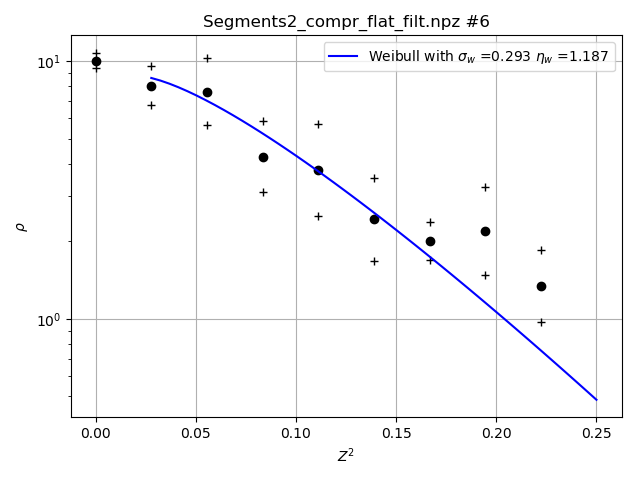

[9.36025142 6.73538606 5.63996332 3.10027826 2.49477154 1.67914812
 1.69723554 1.48502677 0.97124819]
Original =  756
4 0 189 [38 31 26 22 18 14  5  8  8]
4 1 189 [43 28 28 15 27 13  8  5  5]
4 2 189 [45 34 25 14 16 14  7  8  7]
4 3 189 [33 41 22 21 18 14  9  9  1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.1111264443916675
statsigma =  0.3333563324607281


<IPython.core.display.Javascript object>


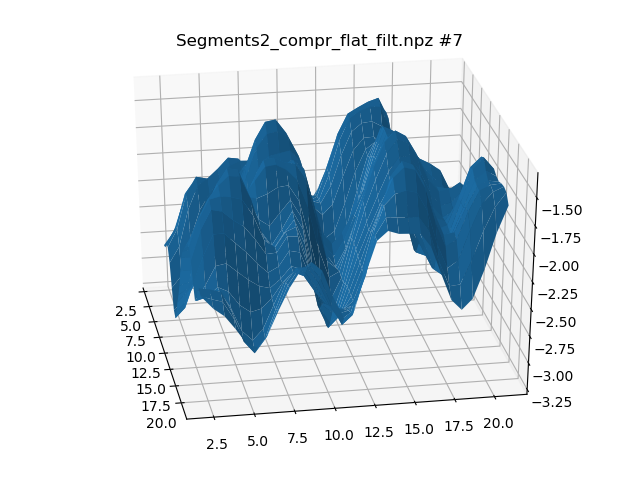

std dev of height =  0.4173287191076575
integral =  0.024101307189542485


<IPython.core.display.Javascript object>


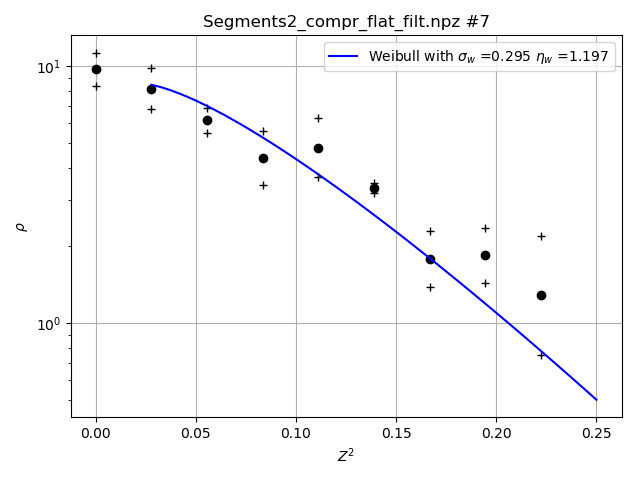

[8.34454085 6.81461597 5.50717485 3.4519641  3.70862825 3.21536397
 1.37896652 1.43272128 0.74981061]
Original =  756
4 0 189 [59 34 22 17 11 16  6  5  4]
4 1 189 [53 39 18 19 11 16  4  7  2]
4 2 189 [52 33 24 16 16 13  7  8  6]
4 3 189 [58 35 23 19  8 13  9  4  8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.1028490826484104
statsigma =  0.32070092399057787


<IPython.core.display.Javascript object>


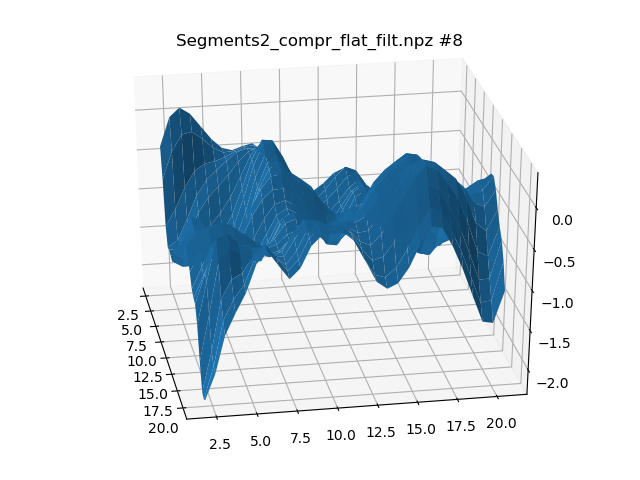

std dev of height =  0.4592954760304245
integral =  0.022941646682653874


<IPython.core.display.Javascript object>


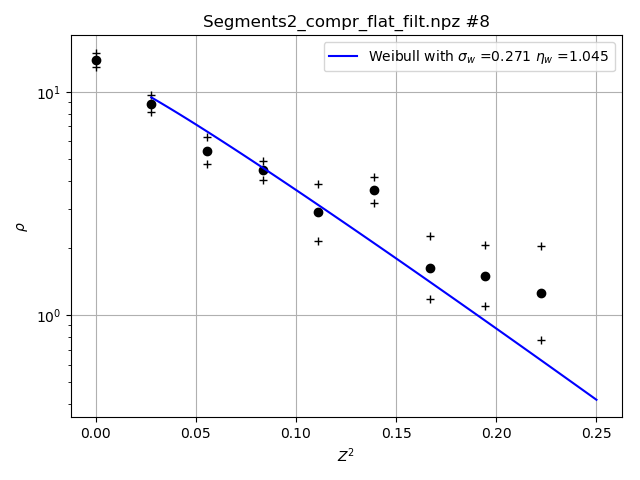

[12.93902027  8.11528683  4.76390988  4.04227682  2.14224297  3.1808336
  1.17735319  1.1020609   0.773896  ]
Original =  756
4 0 189 [52 42 28 19 14  4 10  6  1]
4 1 189 [43 47 27 21 11 11  9  2  2]
4 2 189 [44 39 34 19 16 11  5  7  1]
4 3 189 [53 40 28 19 13 10  8  6  3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.08622563249484562
statsigma =  0.29364201418537783


<IPython.core.display.Javascript object>


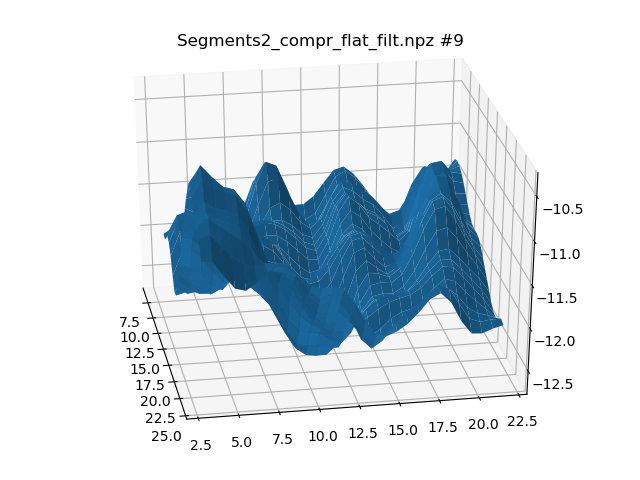

std dev of height =  0.4252415502792031
integral =  0.023857368006304176


<IPython.core.display.Javascript object>


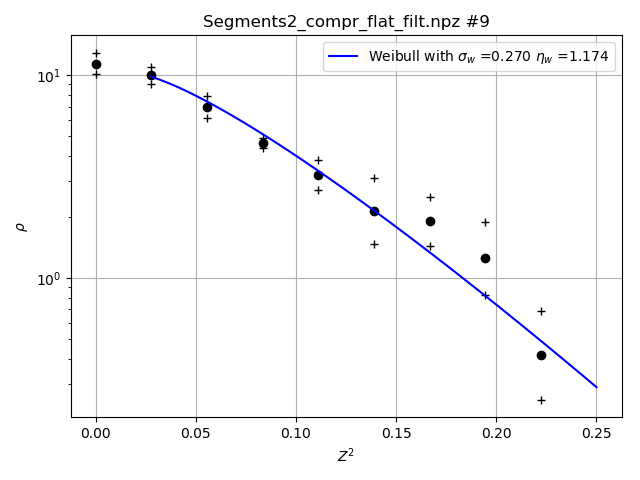

[10.09363085  9.06494006  6.14730522  4.36817785  2.70846902  1.47642617
  1.43628358  0.82808128  0.25105492]
Original =  756
4 0 189 [55 42 25 16 11 10  6  4  4]
4 1 189 [59 40 20 21 15  6  7  4  5]
4 2 189 [62 32 25 20 16  7  5  6  1]
4 3 189 [60 35 26 15 14  2 11 10  1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.08964199839799632
statsigma =  0.2994027361230961


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


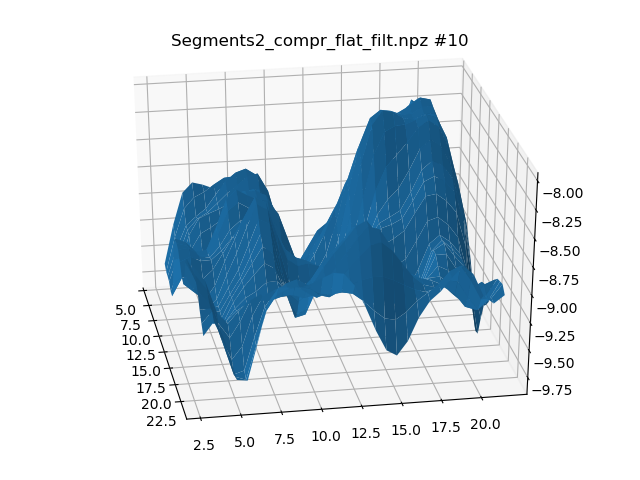

std dev of height =  0.36848381678812175
integral =  0.022862941738299905


<IPython.core.display.Javascript object>


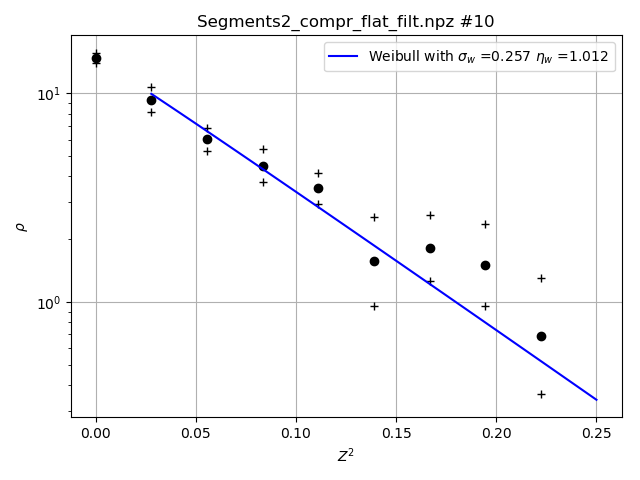

[13.95158525  8.13589239  5.29709879  3.77038889  2.96002667  0.95782618
  1.2653816   0.95990205  0.36254588]
Original =  756
4 0 189 [82 46 22  9 14  1  8  5  1]
4 1 189 [82 37 26 21  7  7  3  2  1]
4 2 189 [86 36 24 20  7  9  1  3  0]
4 3 189 [83 43 24 13  8  4  8  2  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.054124426561744224
statsigma =  0.23264657006228187


<IPython.core.display.Javascript object>


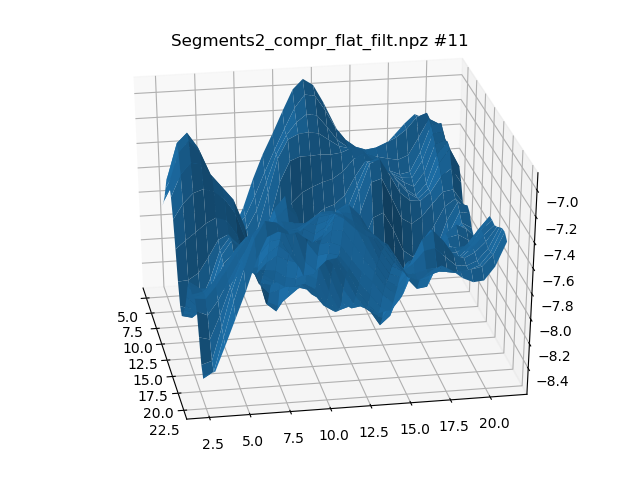

std dev of height =  0.33953441251865824
integral =  0.021511973821210766


<IPython.core.display.Javascript object>


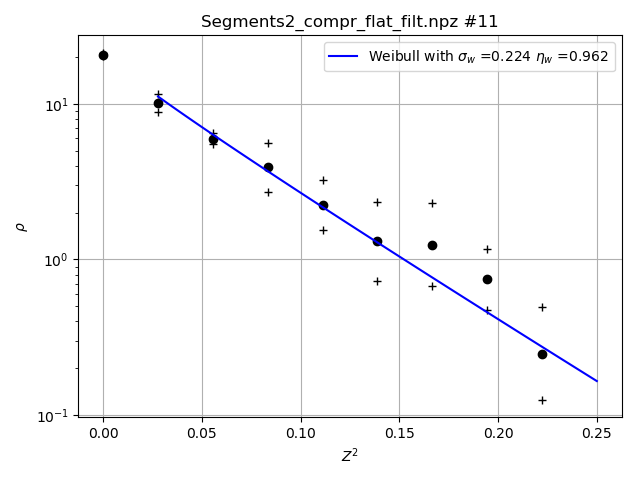

[20.17114207  8.82490092  5.52233402  2.72645395  1.54533456  0.72541481
  0.67066837  0.47663244  0.1256141 ]


In [64]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  756
4 0 189 [82 46 22  9 14  1  8  5  1]
4 1 189 [82 37 26 21  7  7  3  2  1]
4 2 189 [86 36 24 20  7  9  1  3  0]
4 3 189 [83 43 24 13  8  4  8  2  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.054124426561744224
statsigma =  0.23264657006228187
integral =  0.021511973821210766
eta_W =  1.0974741911909602
sigma_W =  0.27743351802166133


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


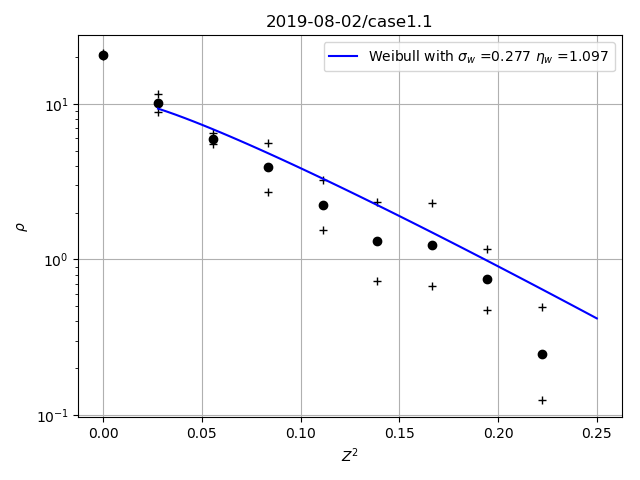

[20.17114207  8.82490092  5.52233402  2.72645395  1.54533456  0.72541481
  0.67066837  0.47663244  0.1256141 ]


<IPython.core.display.Javascript object>


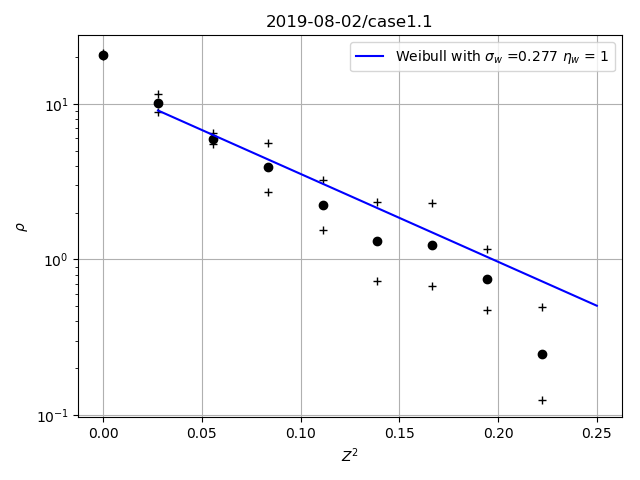

[20.17114207  8.82490092  5.52233402  2.72645395  1.54533456  0.72541481
  0.67066837  0.47663244  0.1256141 ]


In [65]:
# Sum up the accumulated informaion
# Naccum, Laccum = np.shape(Z2flat_list)
# Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,1)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ = 1')
plt.legend()

In [66]:
plt.savefig(Roughnessfilename)